Z-Score approach - (Z-score for anomaly detection) - Z-score tells how many standard deviations away a given observation is from the mean

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
mu, sigma = 50, 10
s = np.random.normal(mu, sigma, 100)

(array([ 3.,  7.,  5., 13., 15., 19., 15., 12.,  9.,  2.]),
 array([24.88286196, 29.87310179, 34.86334163, 39.85358146, 44.84382129,
        49.83406112, 54.82430095, 59.81454078, 64.80478061, 69.79502044,
        74.78526027]),
 <BarContainer object of 10 artists>)

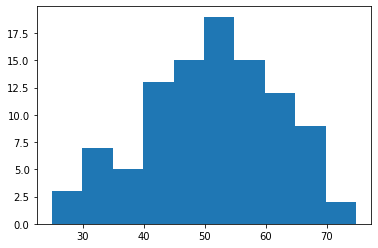

In [4]:
plt.hist(s)

(array([ 3.,  7.,  5., 13., 15., 19., 15., 12.,  9.,  2.]),
 array([24.88286196, 29.87310179, 34.86334163, 39.85358146, 44.84382129,
        49.83406112, 54.82430095, 59.81454078, 64.80478061, 69.79502044,
        74.78526027]),
 <BarContainer object of 10 artists>)

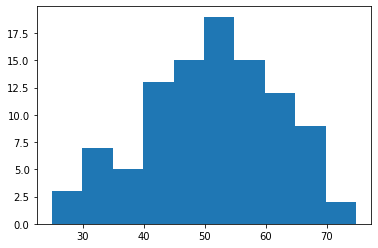

In [5]:
plt.hist(s)

<BarContainer object of 100 artists>

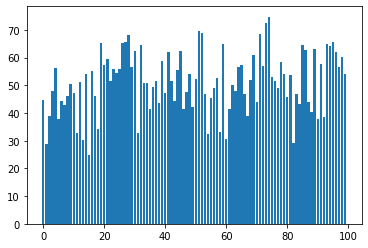

In [6]:
y = np.arange(len(s))
plt.bar(y,s)

In [7]:
s[85] = 120
s[15] = -120

In [8]:
len(s)

100

In [9]:
df = pd.DataFrame(s,columns=['Data'])
df.head()

,Data
0,44.792379
1,28.676840
2,39.062752
3,47.920574
4,56.141552


In [10]:
for col in df.columns:
    col_zscore = col + '_zscore'
    df[col_zscore] = (df[col] - df[col].mean())/df[col].std(ddof=0)

In [11]:
df['outlier'] = (abs(df['Data_zscore'])> 3).astype(int)

In [12]:
df.tail()

,Data,Data_zscore,outlier
95,65.660056,0.724757,0
96,61.864976,0.545407,0
97,56.743384,0.303368,0
98,60.231989,0.468234,0
99,54.160664,0.181312,0


In [13]:
print ("Print number of outliers = " +str(df.outlier.value_counts()[1]))

Print number of outliers = 2


In [14]:
df.loc[df.outlier == 1]

,Data,Data_zscore,outlier
15,-120.0,-8.049287,1
85,120.0,3.292790,1


In [15]:
df.head(18)

,Data,Data_zscore,outlier
0,44.792379,-0.261421,0
1,28.676840,-1.023020,0
2,39.062752,-0.532195,0
3,47.920574,-0.113587,0
4,56.141552,0.274926,0
5,37.744057,-0.594515,0
6,44.305250,-0.284442,0
7,42.796350,-0.355751,0
8,46.104813,-0.199397,0
9,50.645138,0.015173,0
